# Análisis exploratoroio EDA

- Importamos las ibrerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- Entendemos mejor qué información contiene cada variable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# número de nulos 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# número de duplicados 
df.duplicated().sum()

1

In [6]:
#los visualizamos 
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
# Eliminamos los duplicados 
df.drop_duplicates(inplace=True)

## Variable respuesta


<AxesSubplot:xlabel='charges', ylabel='Count'>

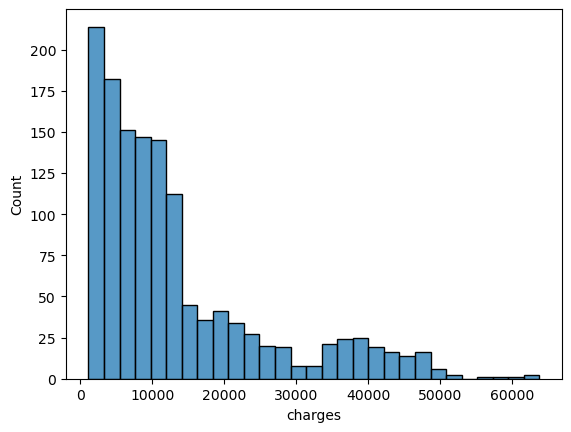

In [8]:
sns.histplot(data=df,
            x="charges")

## Variables predictoras

### - Variables numéricas

In [9]:
# exploramos cuáles son los principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T


,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


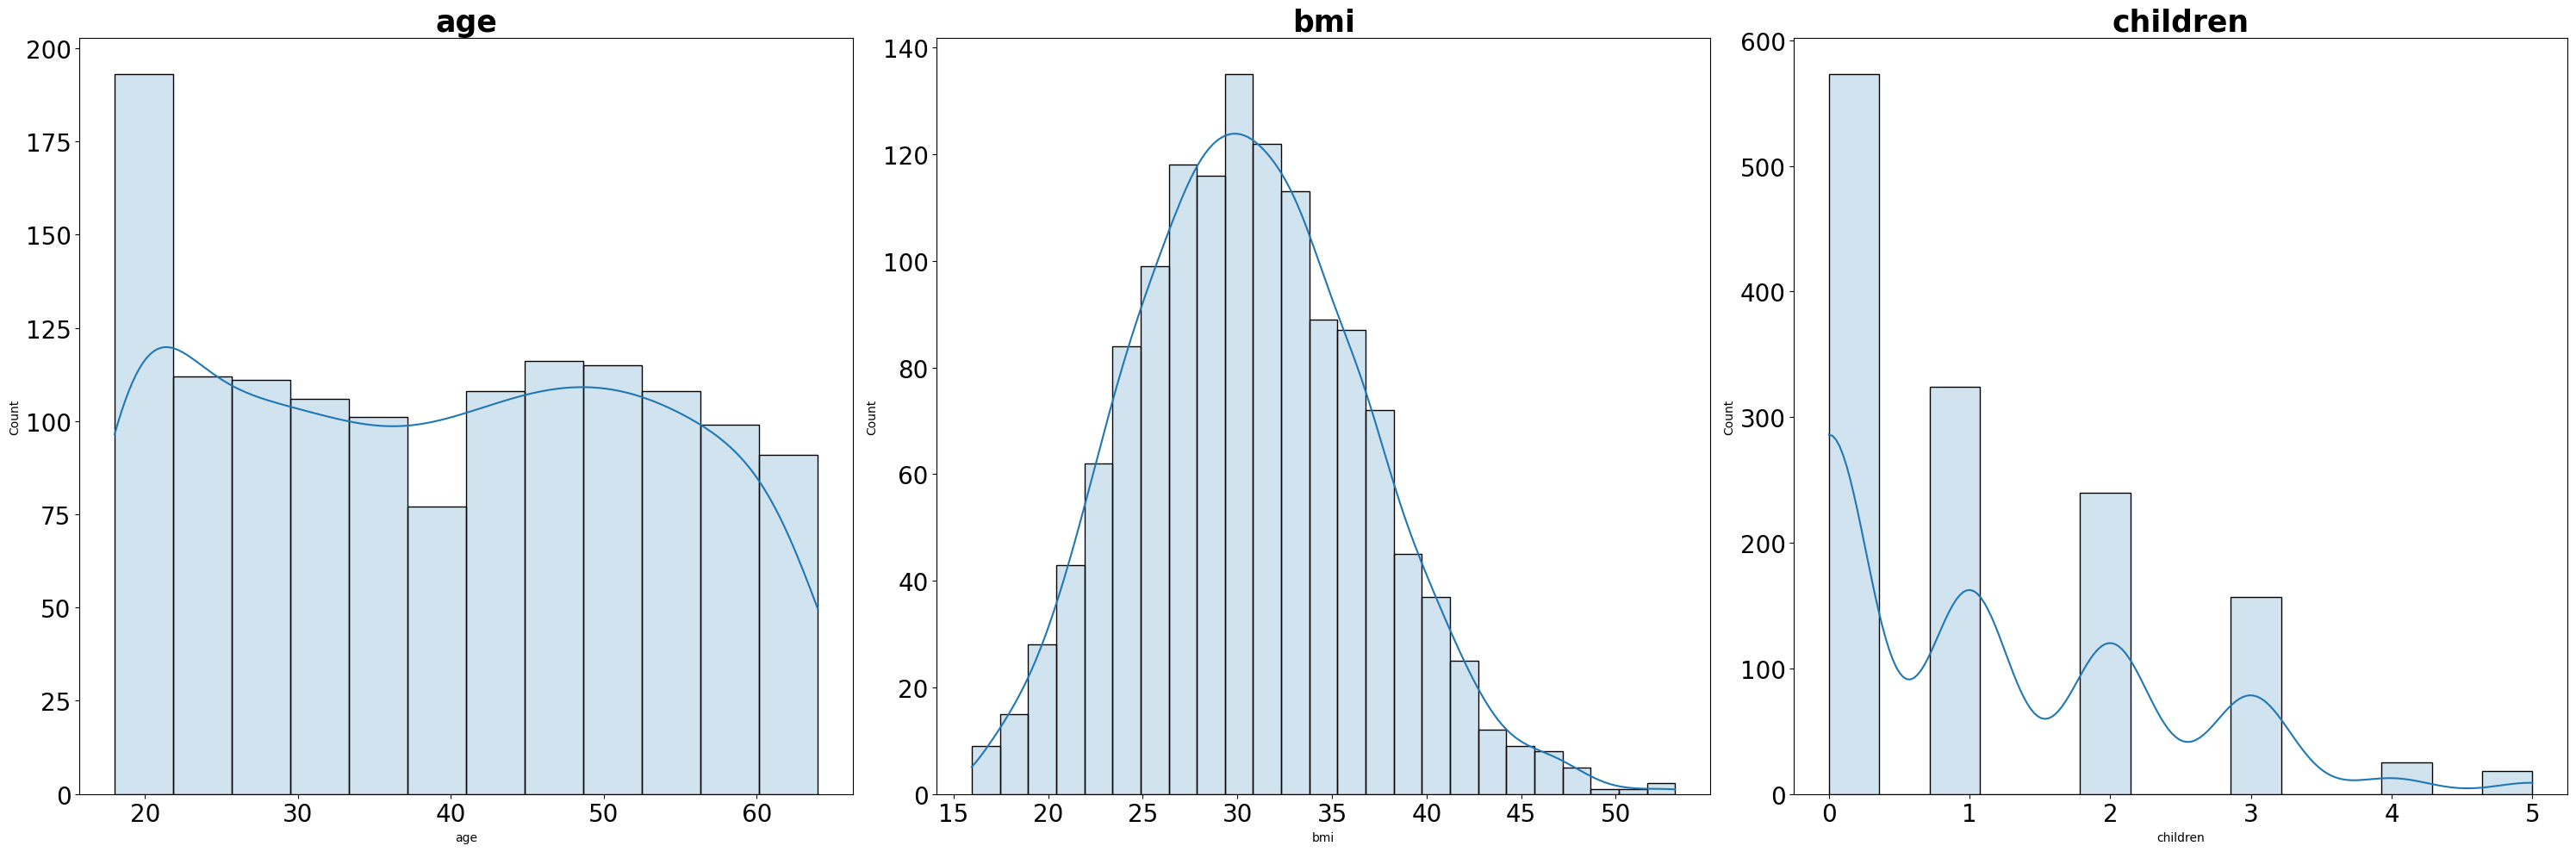

In [10]:
# Distribución de las variables numéricas 

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        alpha = 0.2, 
        ax = axes[i])
   
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)


fig.tight_layout();

In [11]:
# Gráfico de relación entre variables predictoras y la variable a predecir

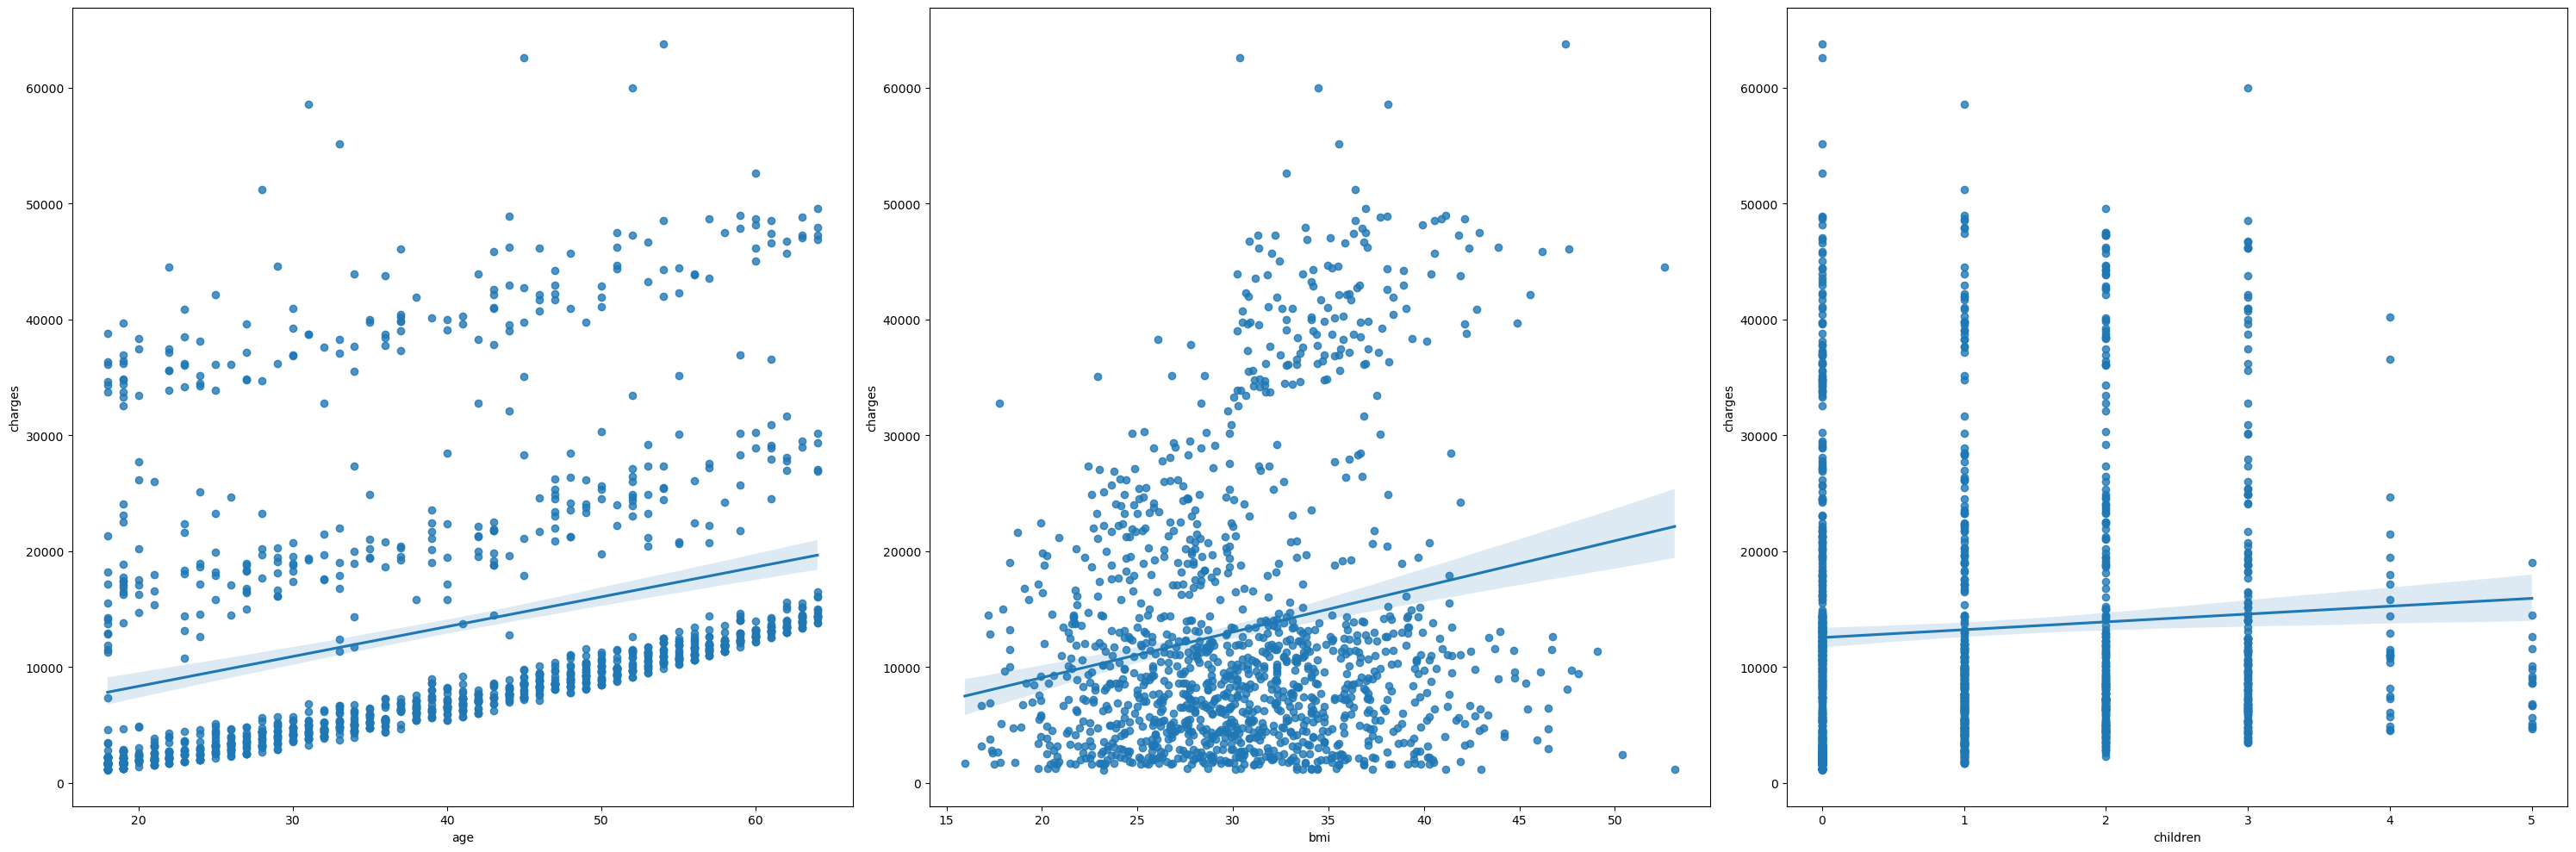

In [12]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

axes = axes.flat #aplana los ejes 

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, columns in enumerate(columnas_numeric):  #enumerate crea un indice por cada elemento que iteramos 
    sns.regplot(  #para cada una de estas iteraciones vamos a hacer plots
        data = df,
        x=columns,
        y= "charges",
        ax = axes[i])    
fig.tight_layout()

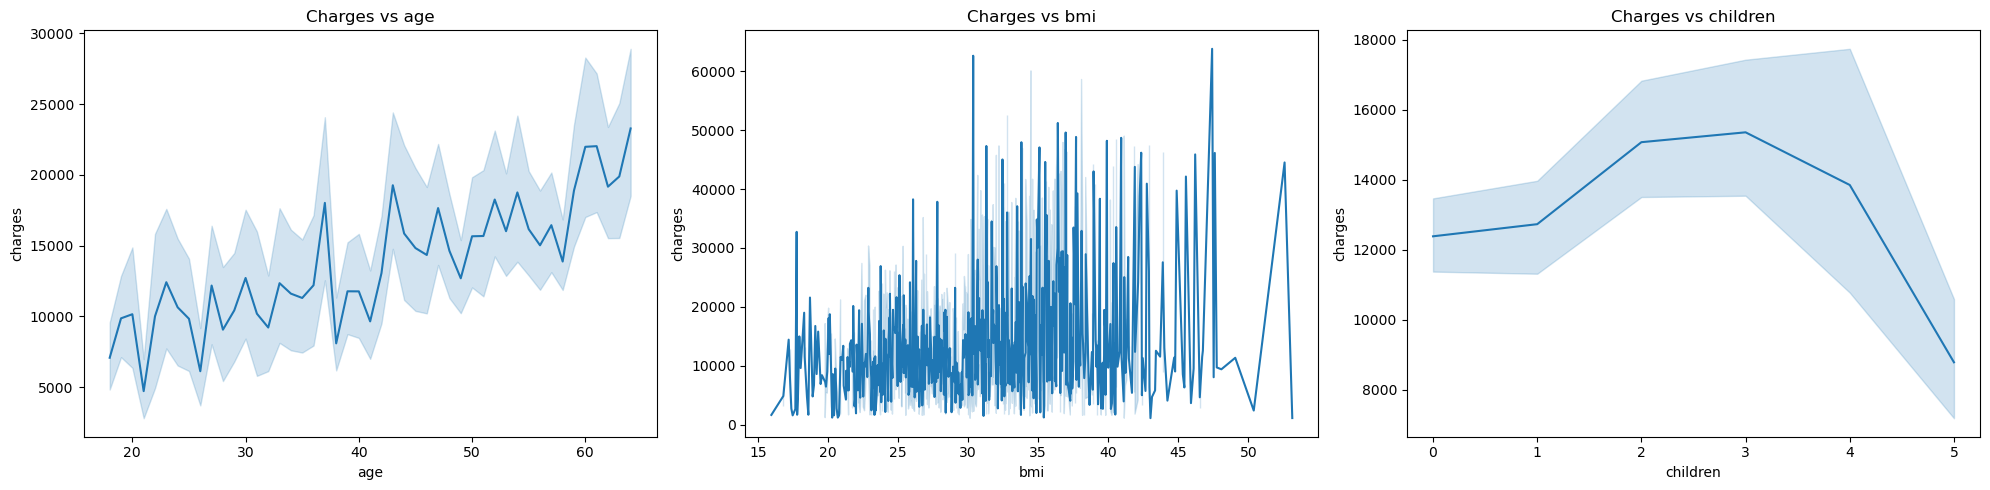

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
for i in range(len(columnas_numeric)):
  col = columnas_numeric[i]
  ax = axs[i]
  ax.set_title(f'Charges vs {col}')
  sns.lineplot(data=df, x=col.lower(), y='charges', ax=ax)
fig.tight_layout()

- El precio del seguro proporcional a la edad.
- El precio aunmenta cuando el bmi es es mayor, pero no es tan estable como la edad

### ------------- Correlación entre variables numéricas-------------------------

/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/333304825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


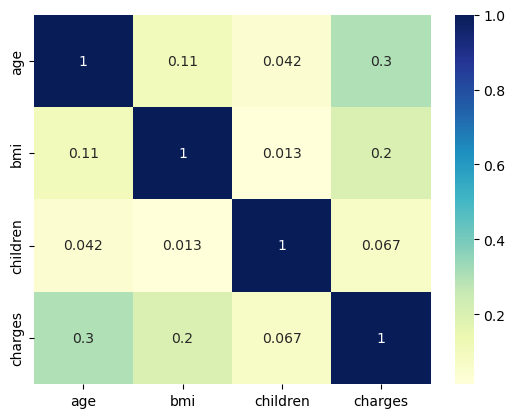

In [13]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [14]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
# matriz triangular de unos que tienen el mismo tamaño que la matriz de correlacion 
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask


/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/1993512353.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/1993512353.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/2657703417.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


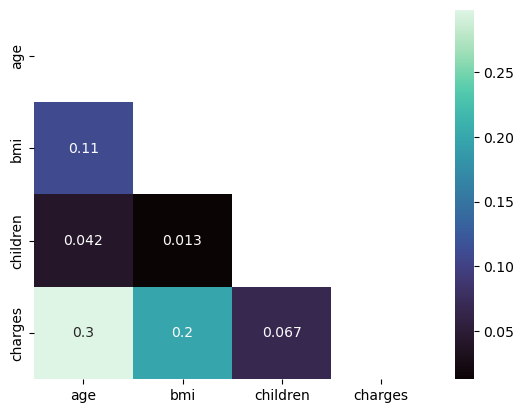

In [15]:
sns.heatmap(df.corr(), 
           cmap = "mako", 
            mask = mask,
           annot = True);

In [16]:
#correlacion de pearson - relacion lineal 
#sperman -

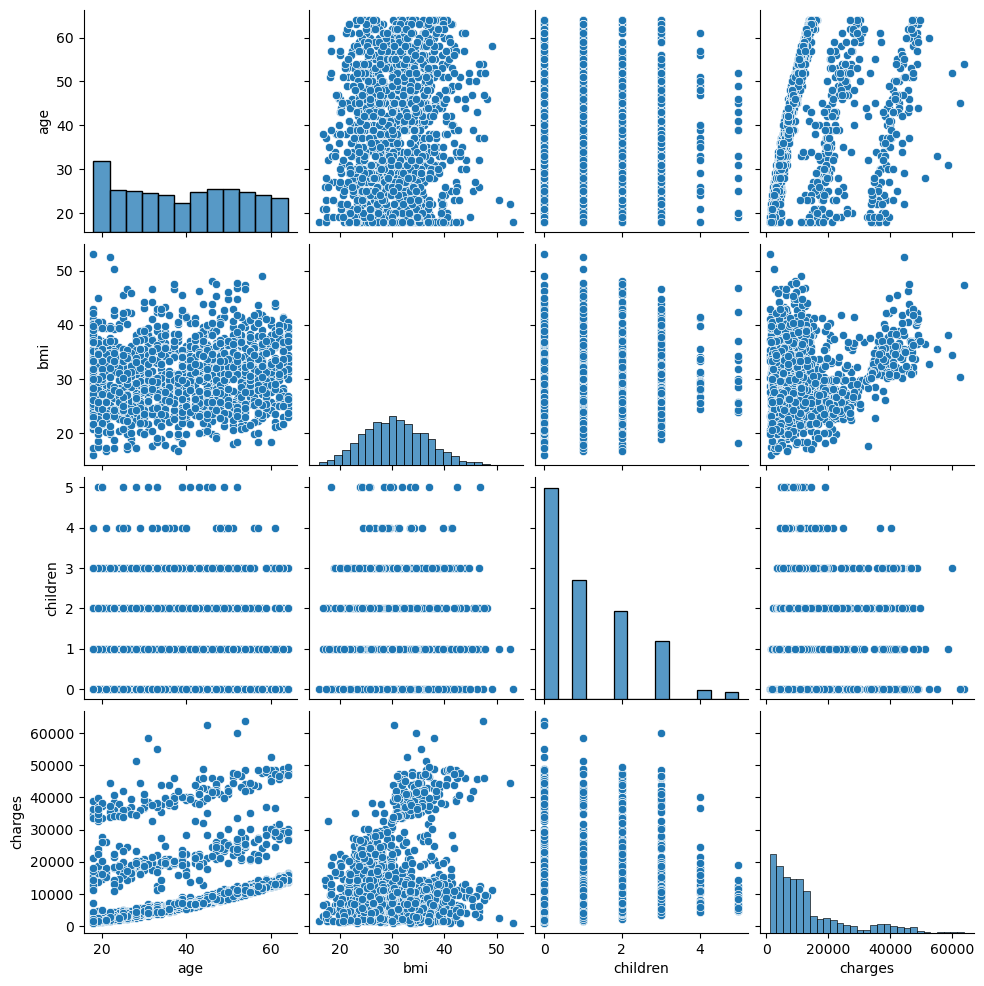

In [17]:
sns.pairplot(data=df)

### -Variables categóricas

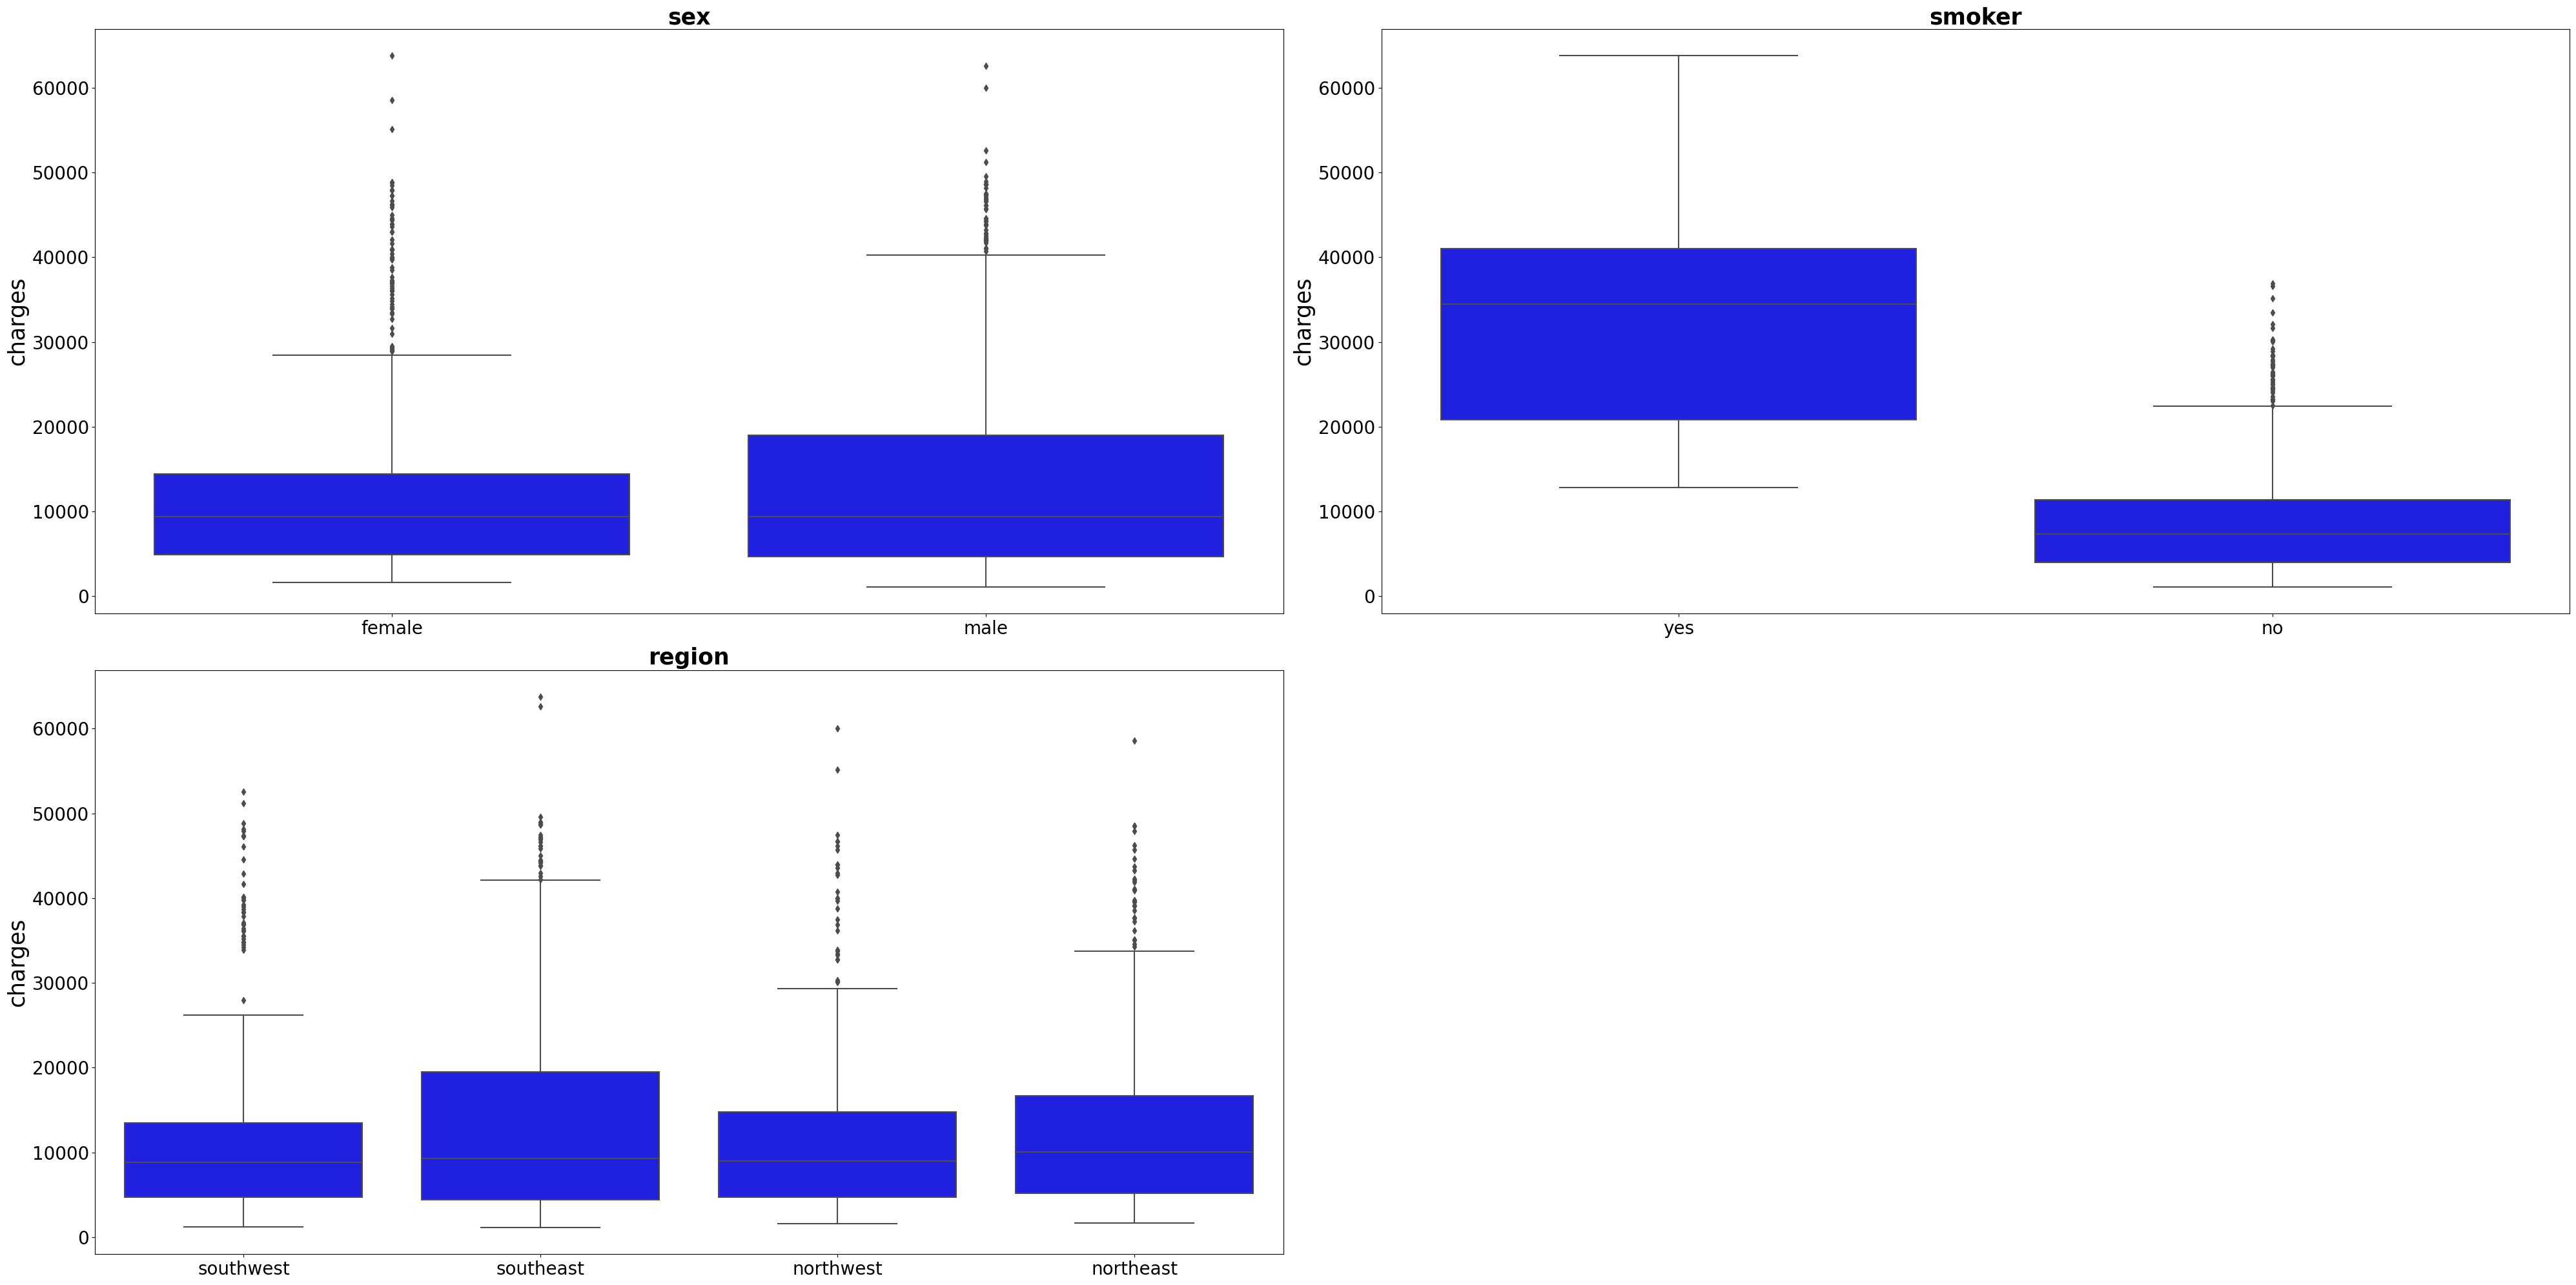

In [18]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "blue", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [19]:
df_categoricas= df.select_dtypes(include= "object")
df_categoricas.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


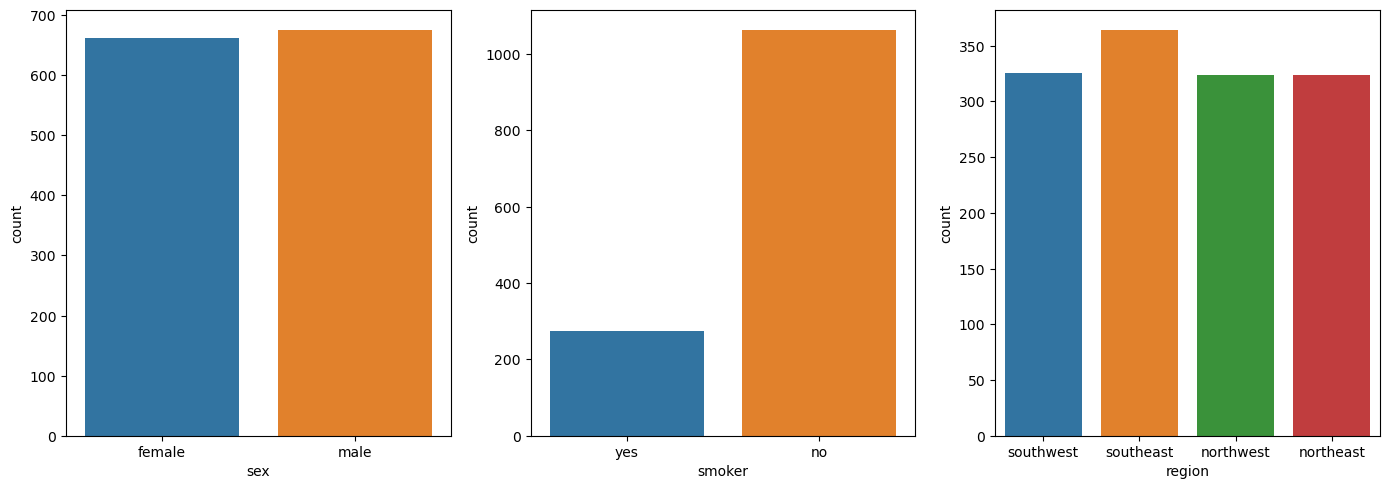

In [20]:
# Lo vemos gráficamente 

fig, axes = plt.subplots(1, 3, figsize = (14,5))

axes = axes.flat

for i, colum in enumerate(df_categoricas):
    sns.countplot(data=df,
                  x=colum,
                  ax=axes[i]);
fig.tight_layout();

### Gráficos de relaciones de nustras variables  con la variable respuesta

In [21]:
# creamos una función que nos sirva para comparar diferentes variables entre sí y luego que nos muestre un gráfico 

def graph_rel (df, column, column_compared):
    df_rel=df.groupby([column])[column_compared].mean().reset_index()
    sns.barplot(data= df_rel, x =column, y =column_compared);

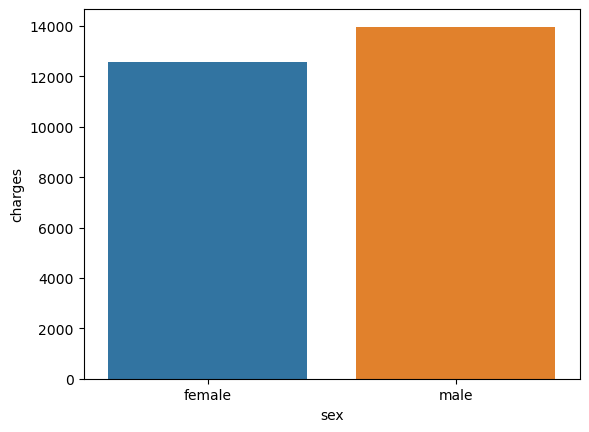

In [22]:
graph_rel(df,"sex","charges")

        - Ambos géneros están muy cerca.

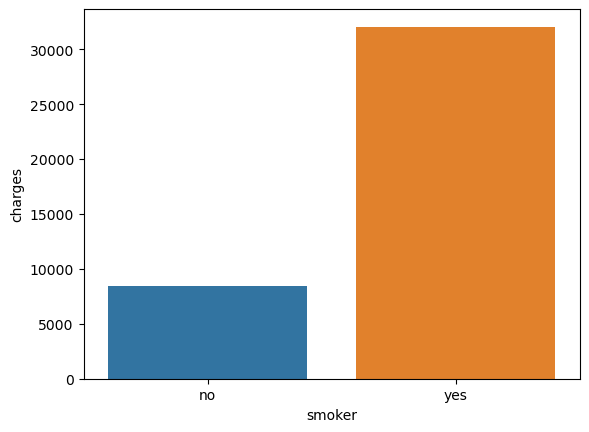

In [23]:
graph_rel(df,"smoker","charges")

        - Los no fumadores tienden a pagar menos

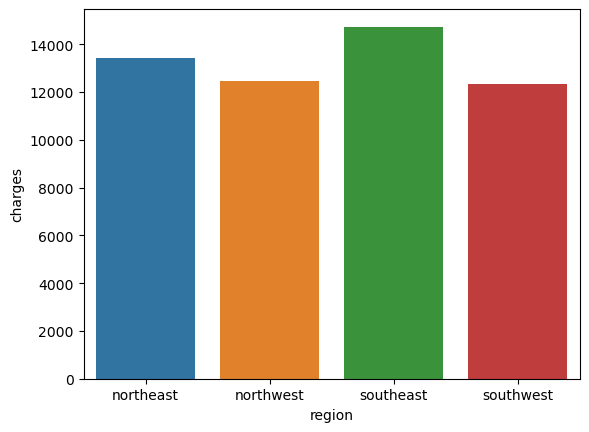

In [24]:
graph_rel(df,"region","charges")

        - Todas las regiones  se parecen mucho en coste
        - En el suroeste y noroeste tienden a pagar menos 

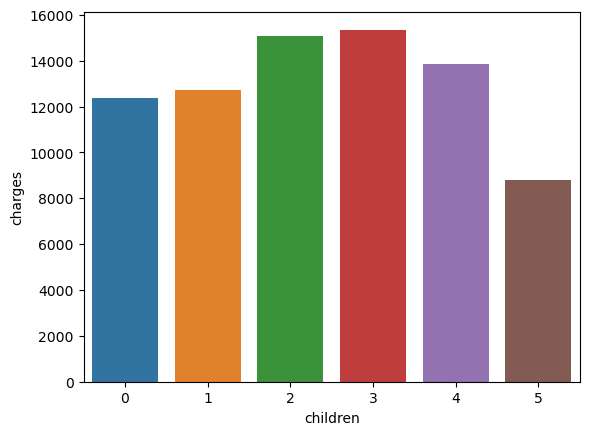

In [25]:
graph_rel(df,"children","charges")

        - El numero de niños aumenta el precio pero se observa que baja cuando el numero es de 5, puede que sea que muy poca gente tenga de 4 a 5 hijos

- Creamos un nuevo dataframe con edad como variable categorica para poder visualizar mejor 

In [41]:
df_age=df.copy()

In [42]:
df_age["age_range"] = pd.cut(df["age"], bins=[18, 30, 59, np.inf], labels=["Young", "Adult", "Old"], right=False)

In [43]:
df_age = df_age.drop('age', axis=1)

In [44]:
df_age.head(1)

,sex,bmi,children,smoker,region,charges,age_range
0,female,27.9,0,yes,southwest,16884.924,Young


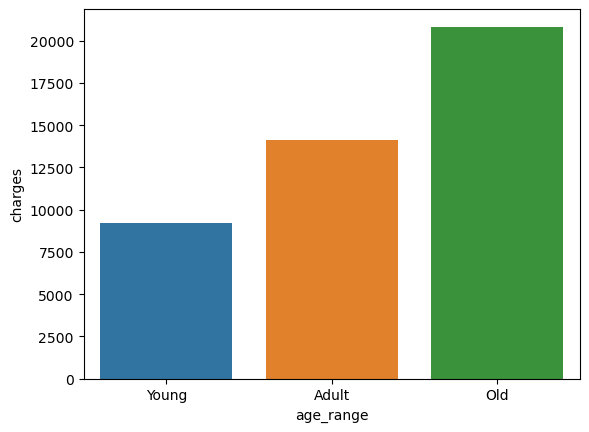

In [32]:
graph_rel(df_age,"age_range","charges")

<AxesSubplot:xlabel='age_range', ylabel='charges'>

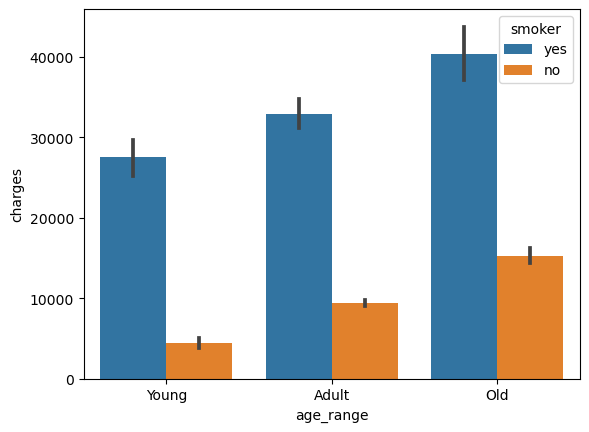

In [33]:
sns.barplot(x="age_range", y='charges', hue="smoker", data=df_age)


<AxesSubplot:xlabel='children', ylabel='charges'>

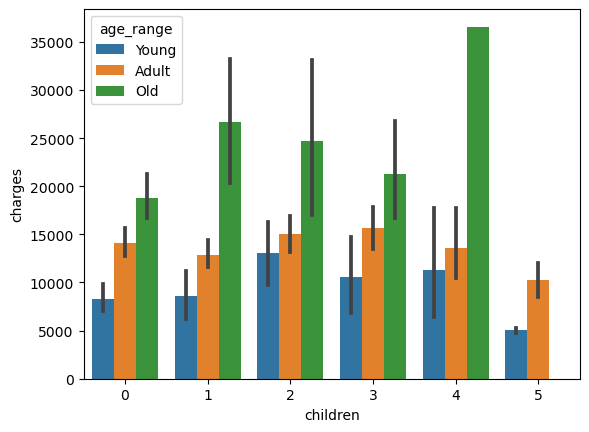

In [34]:
sns.barplot(x="children", y='charges', hue="age_range", data=df_age)

<AxesSubplot:xlabel='region', ylabel='charges'>

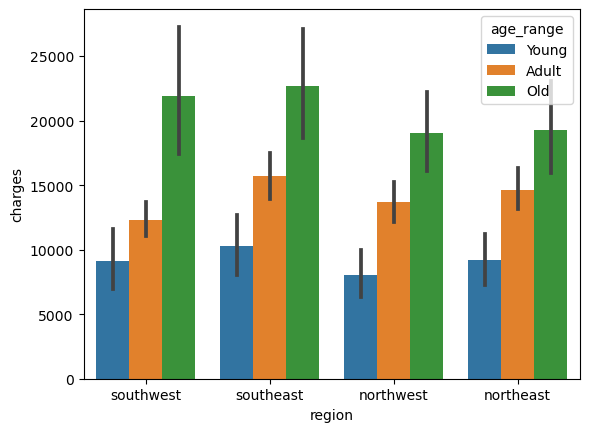

In [35]:
sns.barplot(x="region", y='charges', hue="age_range", data=df_age)

# Preprocesado

## Gestión de outliers

In [38]:
df_numericas = df.select_dtypes(include=np.number)

In [39]:
df_numericas.head(2)

,age,bmi,children,charges
0,19,27.90,0,16884.9240
1,18,33.77,1,1725.5523


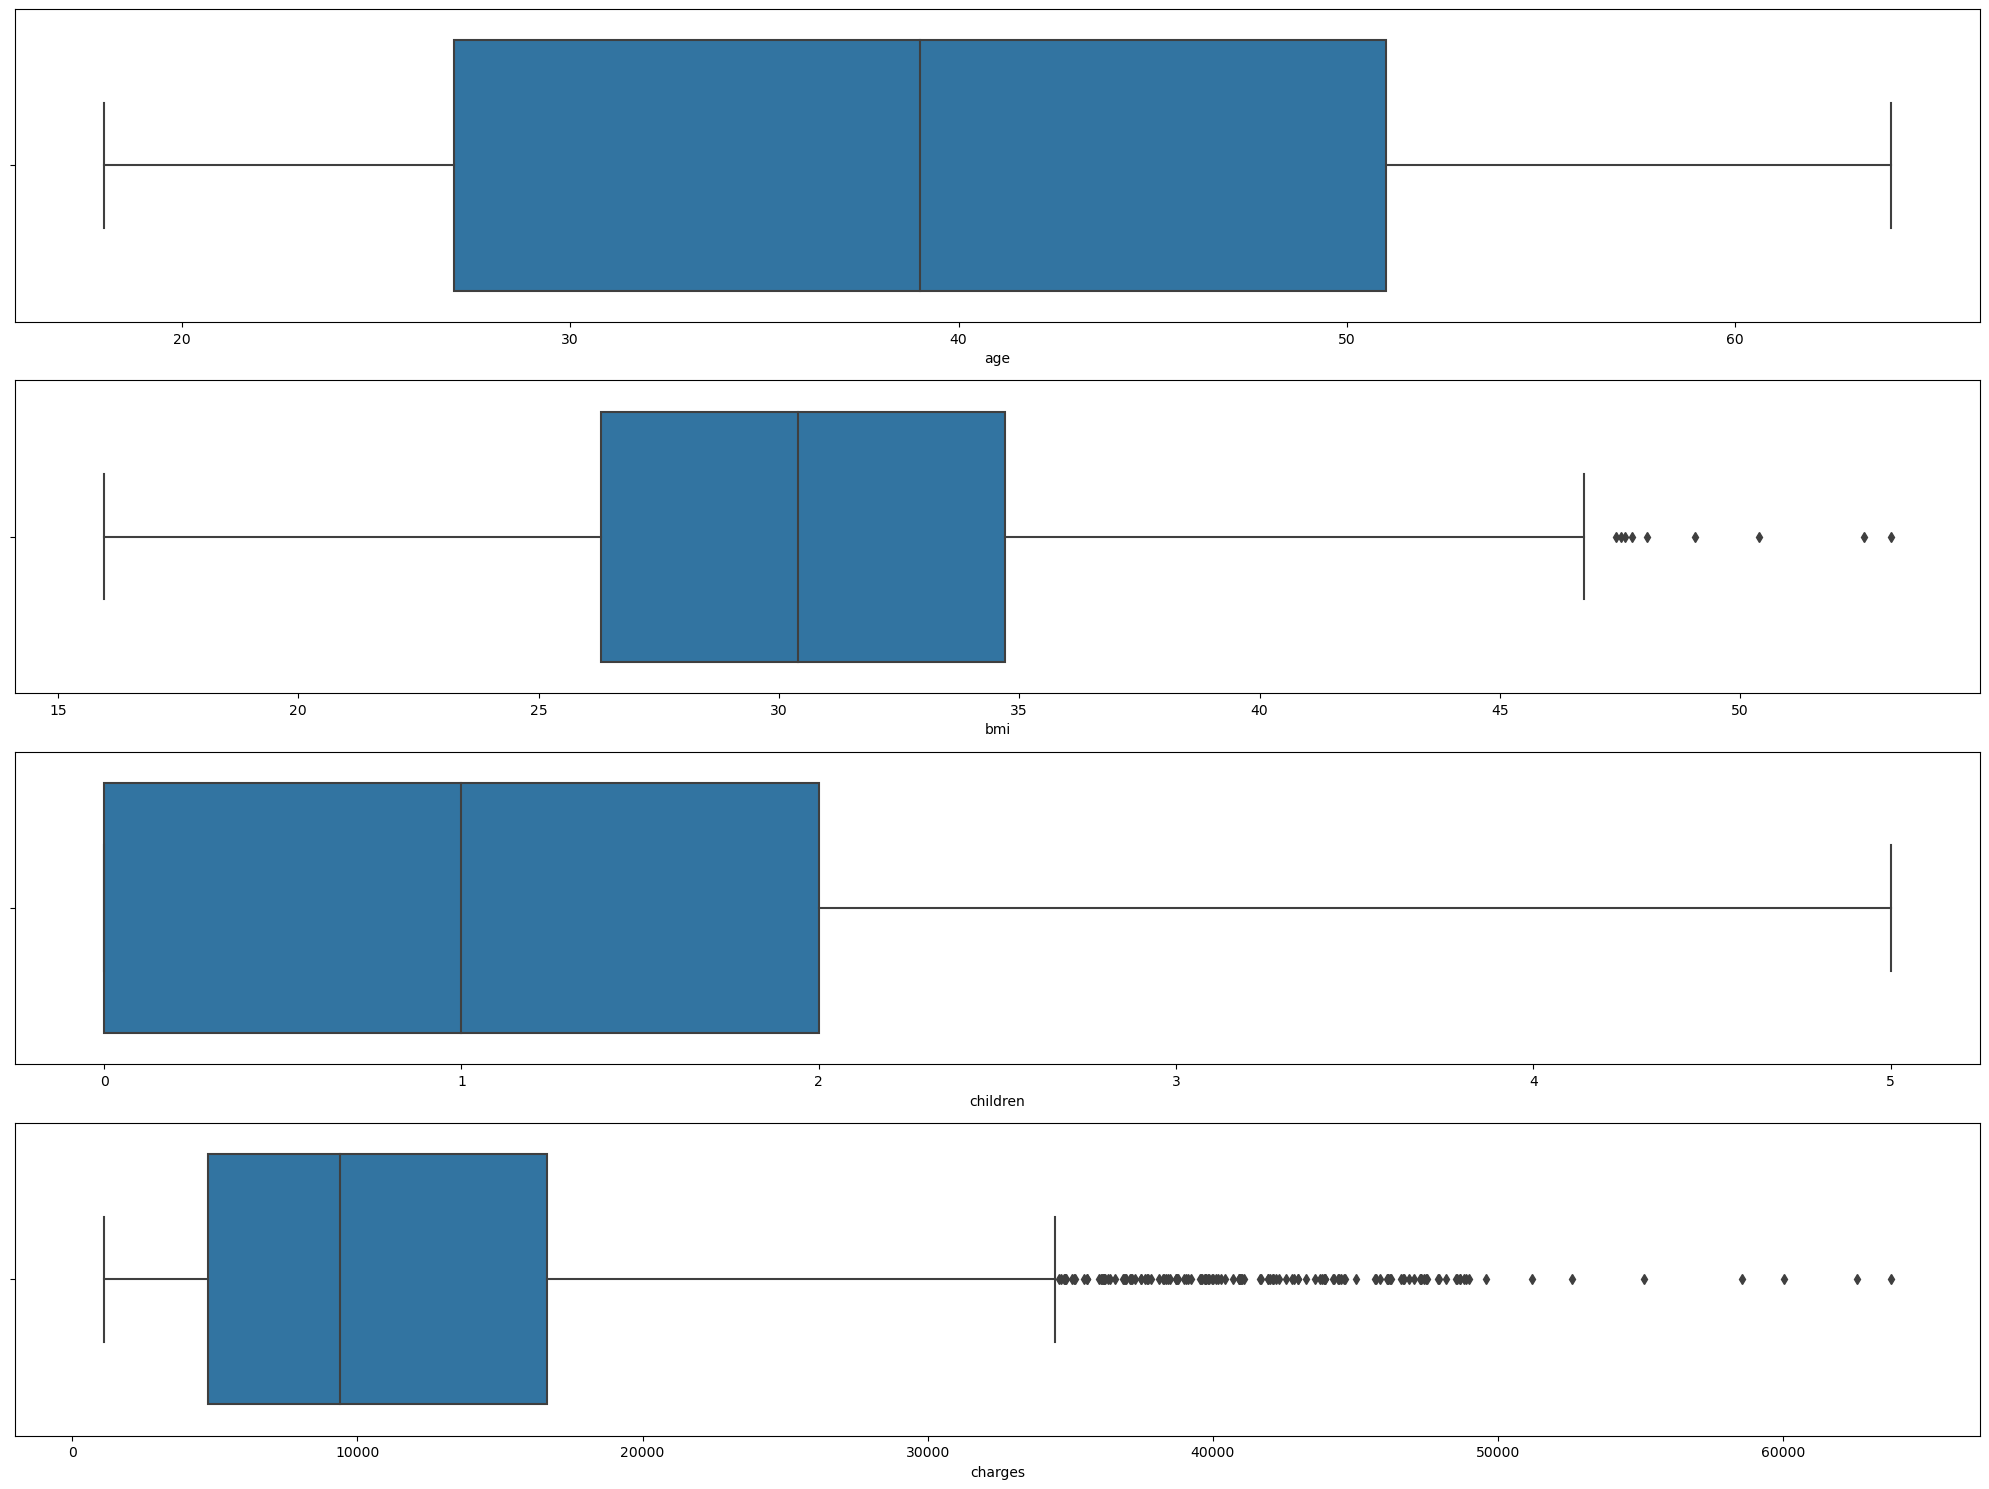

In [40]:
fig,axes= plt.subplots(nrows=4, ncols= 1, figsize=(20,15))
for i, columna in enumerate(df_numericas.columns):
    sns.boxplot(data=df_numericas,
               x=columna,
               ax=axes[i])
plt.tight_layout()

In [46]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [56]:
df_smoker=df[df['smoker'] == "yes"]
df_no_smoker=df[df['smoker'] == "no"]

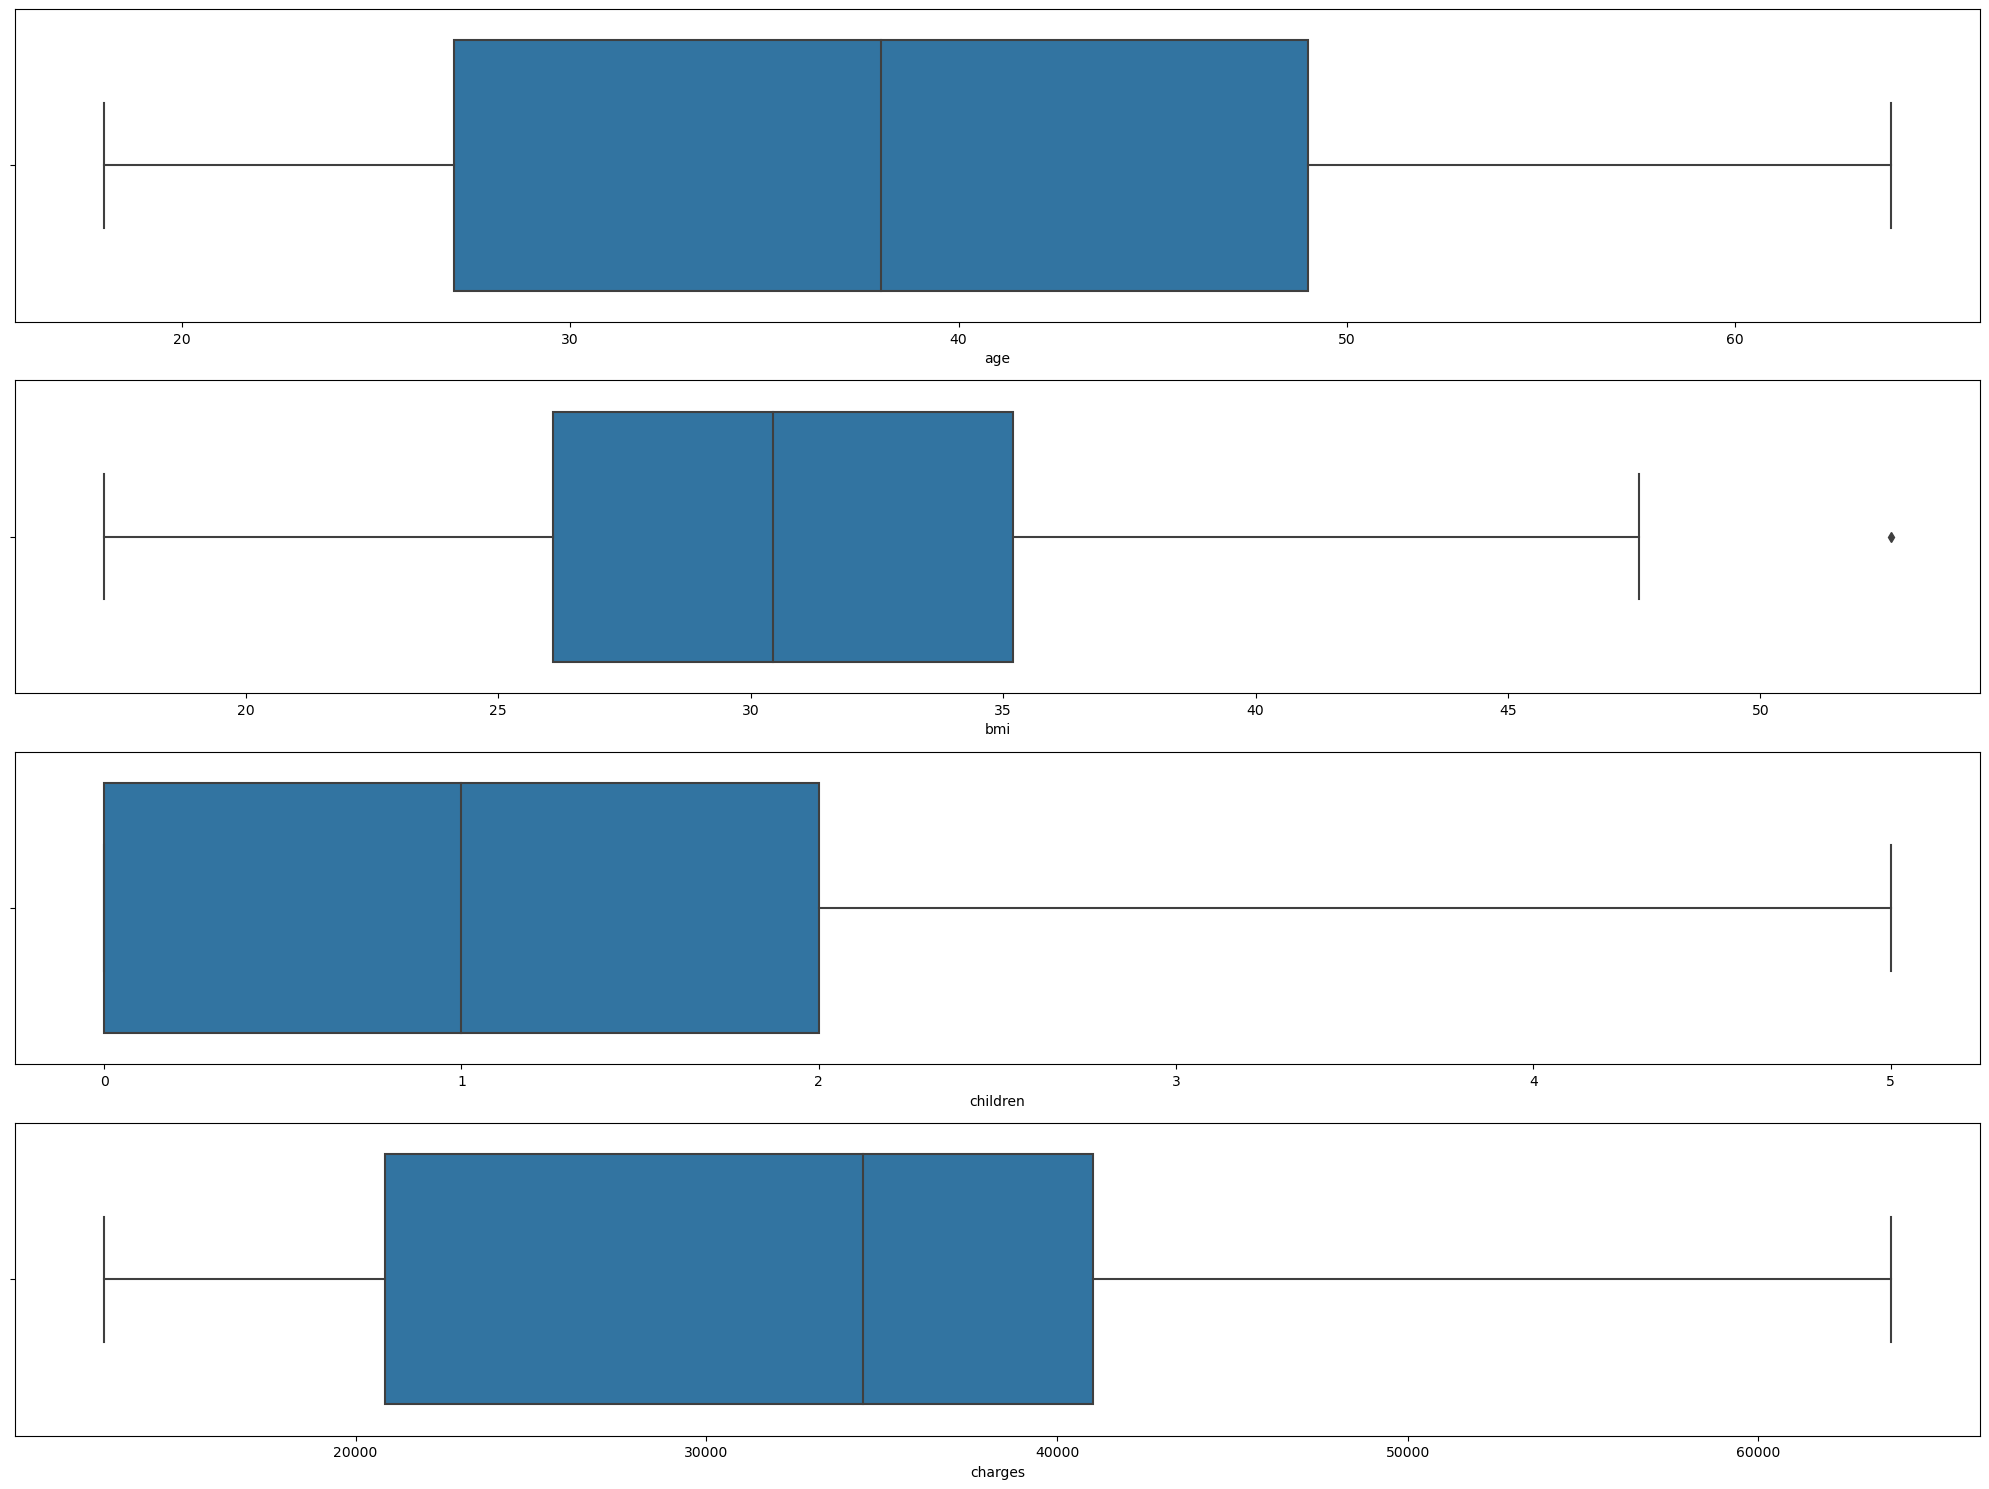

In [87]:
df_smoker_num=df_smoker.select_dtypes(include=np.number)
fig,axes= plt.subplots(nrows=4, ncols= 1, figsize=(20,15))
for i, columna in enumerate(df_smoker_num.columns):
    sns.boxplot(data=df_smoker_num,
               x=columna,
               ax=axes[i])
plt.tight_layout()

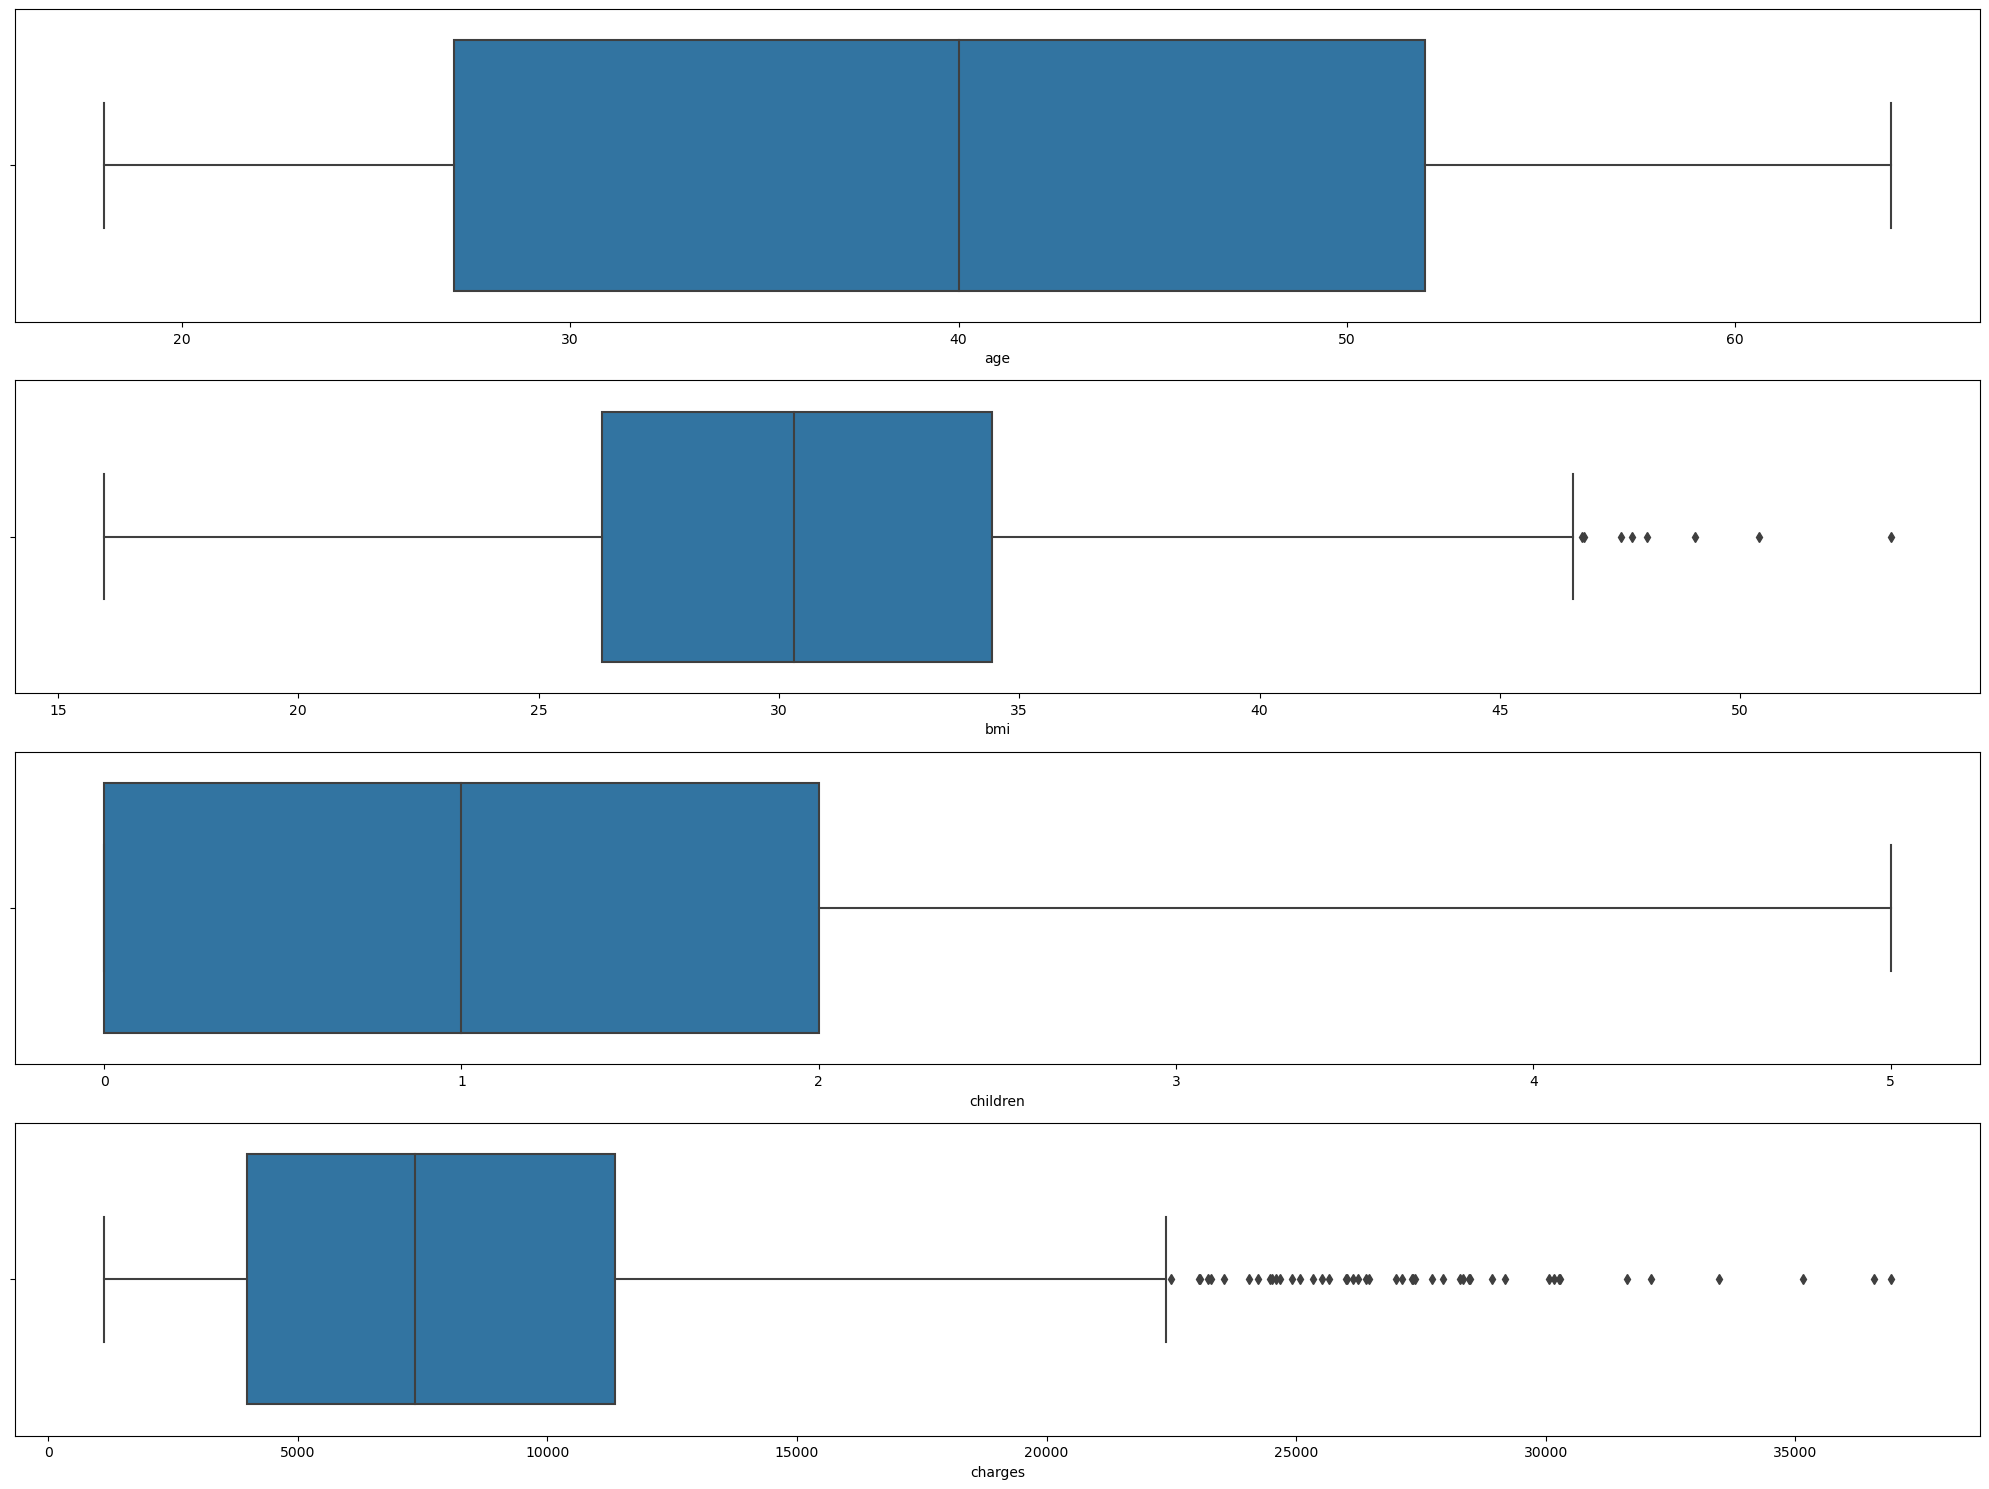

In [88]:
df_nosmoker_num=df_no_smoker.select_dtypes(include=np.number)
fig,axes= plt.subplots(nrows=4, ncols= 1, figsize=(20,15))
for i, columna in enumerate(df_nosmoker_num.columns):
    sns.boxplot(data=df_nosmoker_num,
               x=columna,
               ax=axes[i])
plt.tight_layout()

In [77]:
Q1=np.nanpercentile(df["charges"],25)
Q3=np.nanpercentile(df["charges"],75)

In [78]:
IQR=Q3-Q1
IQR

7523.34465

In [80]:
outlier_step = 1.5 * IQR
outlier_step

11285.016975

In [81]:
outliers_data = df[(df["charges"] < Q1 - outlier_step) | (df["charges"] > Q3 + outlier_step)]

In [82]:
outliers_data

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
11,62,female,26.290,0,yes,southeast,27808.72510
52,48,male,28.000,1,yes,southwest,23568.27200
57,18,male,31.680,2,yes,southeast,34303.16720
62,64,male,24.700,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
1267,24,male,31.065,0,yes,northeast,34254.05335
1281,47,female,27.645,2,yes,northwest,24535.69855
1308,25,female,30.200,0,yes,southwest,33900.65300
1321,62,male,26.695,0,yes,northeast,28101.33305


In [83]:
outliers_data["smoker"].value_counts()

yes    45
no     38
Name: smoker, dtype: int64

In [47]:
def deteccion_outliers(lista_columnas, df):
    
    dicc_indices={}
    for i in lista_columnas:
        
        Q1 = np.nanpercentile(df[i], 25)
        Q3 = np.nanpercentile(df[i], 75)
        # calculamos el rango intercuartil
        IQR = Q3 - Q1

        # calculamos los límites
        outlier_step = 1.5 * IQR
        outliers_data = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)]

        if outliers_data.shape[0]>0:
            dicc_indices[i]= outliers_data.index
        else:
            pass
    return dicc_indices

In [48]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [62]:
ind=deteccion_outliers(lista_columnas, df)

In [63]:
print(ind)

{'bmi': Int64Index([116, 286, 401, 543, 847, 860, 1047, 1088, 1317], dtype='int64'), 'charges': Int64Index([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,
            ...
            1241, 1249, 1284, 1288, 1291, 1300, 1301, 1303, 1313, 1323],
           dtype='int64', length=139)}


In [64]:
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  
    else: 
        mediana = df[k].median() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
        for i in v: # iteremos por la lista de valores para cada columna
            df.loc[i,k] = mediana 

In [66]:
df_= df.select_dtypes(include = np.number)
df_= df_.drop("charges", axis=1)

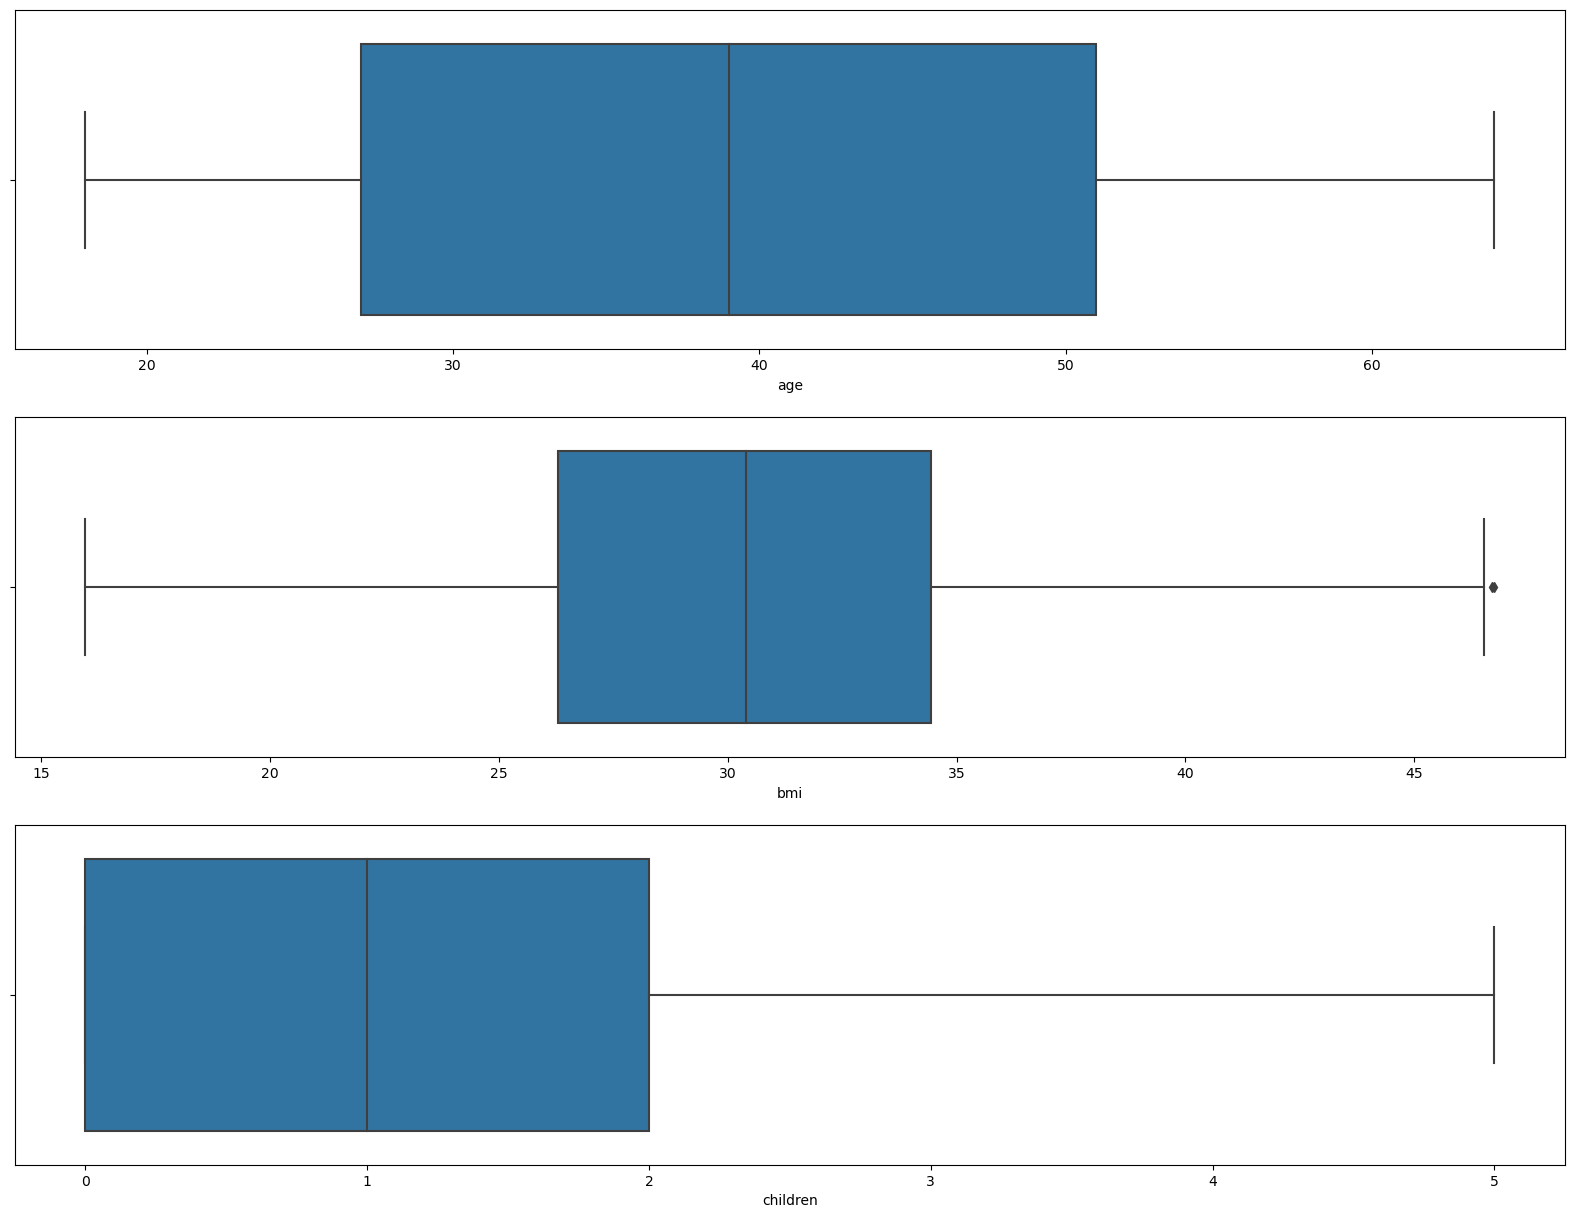

In [69]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df_.columns)):
    
    sns.boxplot(x=df_.columns[i], 
                data=df_, 
                ax=ax[i])
plt.show()

# Normalización y estandarización 

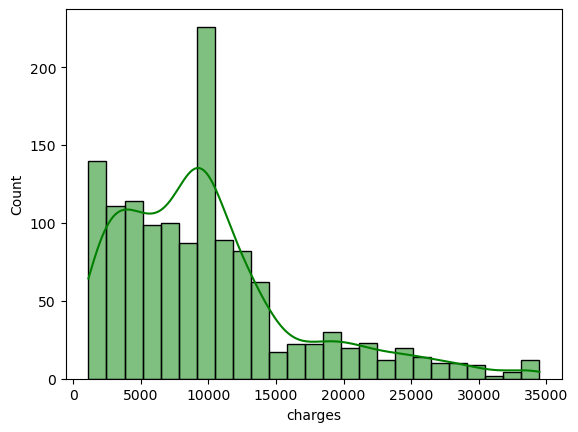

In [89]:
#Normalizar.
sns.histplot(df["charges"], 
             kde = True, 
             color = "green");

In [96]:
from scipy import stats

In [97]:
df["charges_box"], lambda_ajustada= stats.boxcox(df["charges"])

/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/3773214610.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'] ,ax = axes[0])
/var/folders/3v/w3g18dxj3gz5w9dw0dh5z2z00000gn/T/ipykernel_36278/3773214610.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges

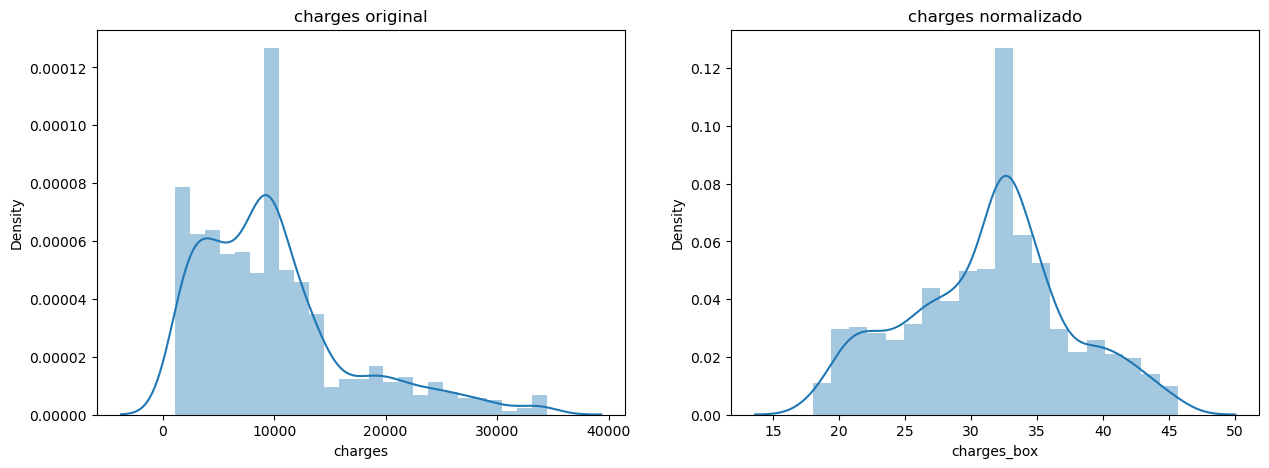

In [98]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('charges original')
axes[1].set_title('charges normalizado')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df['charges_box'], ax = axes[1]);

## Codificación de  variables categóricas ( ENCODING)


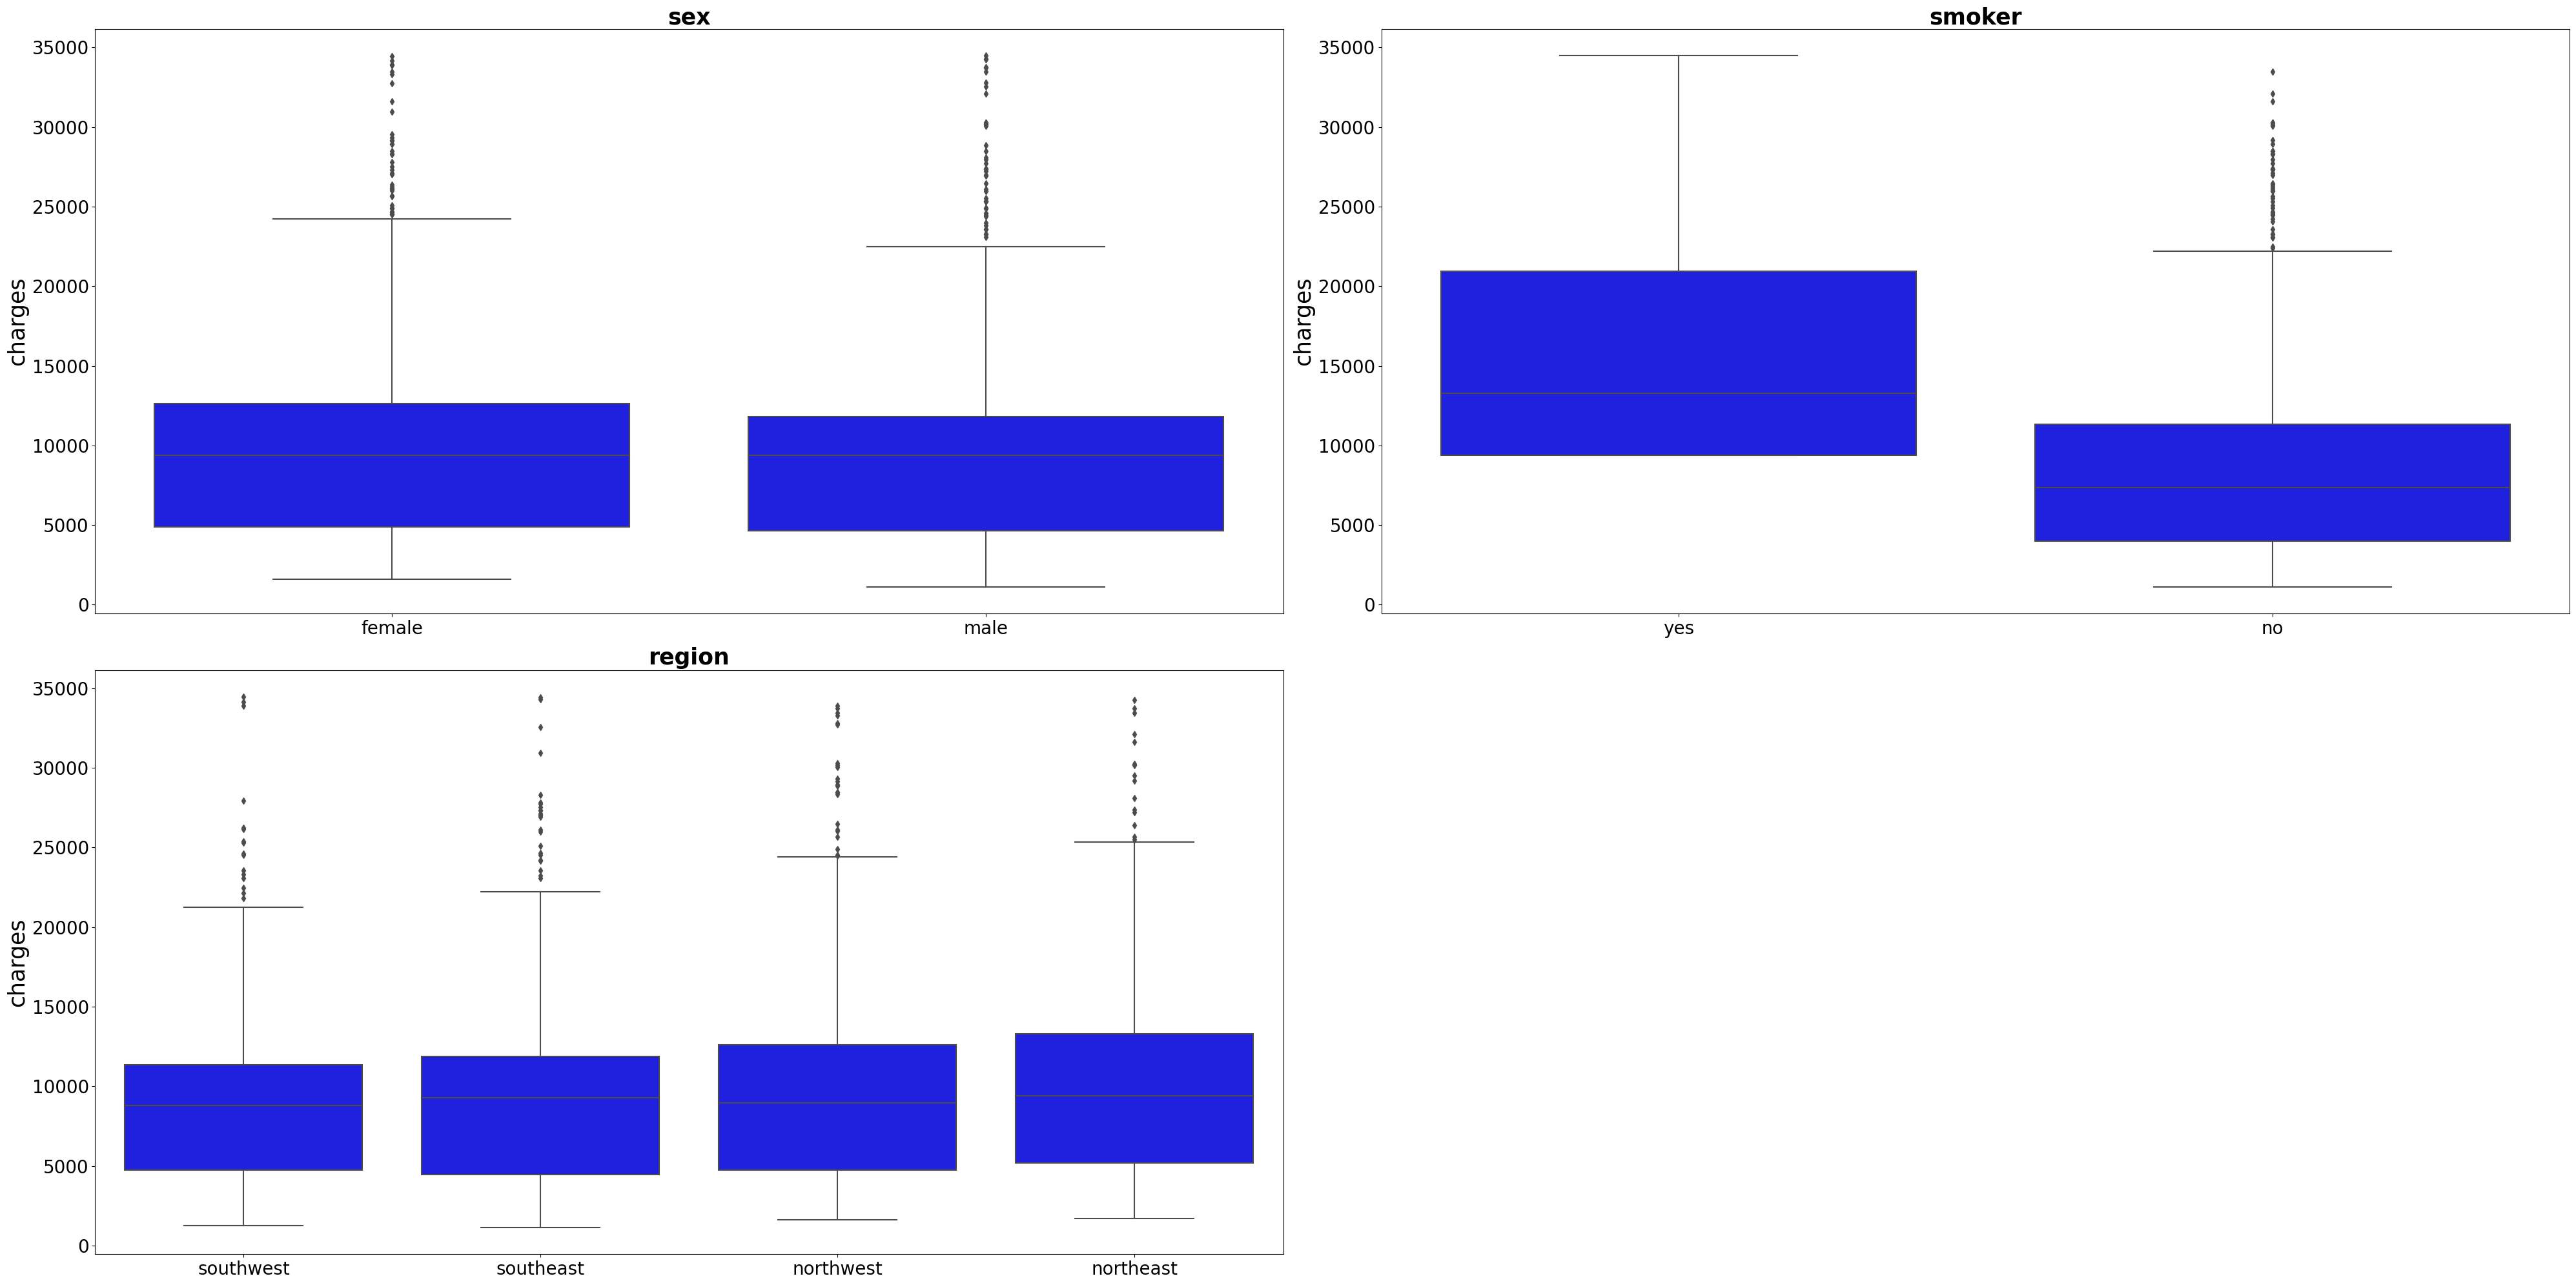

In [109]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df,
        x = colum,
        y = "charges",
        color = "blue", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

In [110]:
df_cat = df.select_dtypes(include=["object", "category"])

In [111]:
from sklearn.preprocessing import OneHotEncoder  

In [112]:
# iniciamos el método de OneHot Encoder
oh = OneHotEncoder()

In [113]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff
    

In [114]:
df = one_hot_encoder(df, ["sex", "smoker","region"])

In [115]:
df.head()

,age,bmi,children,charges,charges_box,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,37.948594,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,20.381259,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,26.552068,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,40.661268,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,25.548464,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
